In [24]:
!pip install imblearn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2/2 [imblearn]d-learn]


In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv("feat_engineered_normalized_dset.csv", index_col=0)
df.shape

(14476, 11)

In [15]:
df.head()

,mean,std,min,q1,median,q3,max,iqr,skew,kurtosis,label
0,0.162237,0.148038,-0.132835,-0.370153,0.373207,0.103133,0.391489,0.333210,-0.372680,-0.277113,pulsar
1,0.153767,0.142553,-0.132835,-0.370153,0.363400,0.121570,0.391489,0.356461,-0.373431,-0.281692,pulsar
2,0.131413,0.120962,-0.132835,-0.370153,0.326621,0.067839,0.391489,0.288702,-0.309927,-0.222986,pulsar
3,0.122973,0.120328,-0.132835,-0.370153,0.308232,0.057304,0.391489,0.275416,-0.290519,-0.210699,pulsar
4,0.117429,0.107567,-0.132835,-0.370153,0.313136,0.009894,0.391489,0.215628,-0.294595,-0.218115,pulsar


In [16]:
X, y = df.drop(columns=["label"]), df["label"]
X.shape, y.shape

((14476, 10), (14476,))

In [19]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y     # important for imbalanced data
)

In [48]:
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
y_train.value_counts(), y_train_res.value_counts()

(label
 pulsar    8915
 bh        2665
 Name: count, dtype: int64,
 label
 pulsar    8915
 bh        8915
 Name: count, dtype: int64)

In [49]:
clf = LogisticRegression(class_weight='balanced')
clf.fit(X_train_res,y_train_res)
print("Logistic Regression Score: %.3f"%clf.score(X_train_res,y_train_res))

Logistic Regression Score: 0.880


In [50]:
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          bh       0.67      0.87      0.76       666
      pulsar       0.96      0.87      0.91      2230

    accuracy                           0.87      2896
   macro avg       0.81      0.87      0.83      2896
weighted avg       0.89      0.87      0.88      2896



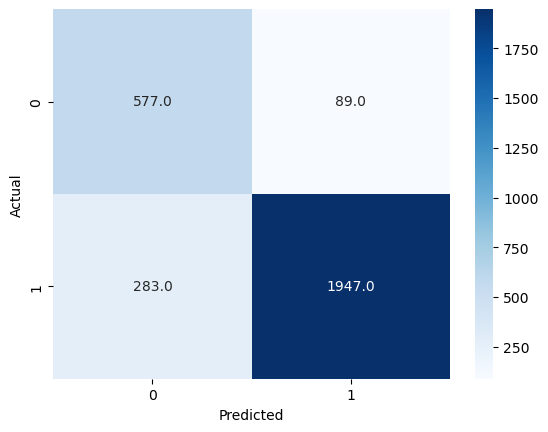

In [51]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, cmap='Blues', fmt=".1f")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [53]:
# the precision for bh is low suggesting that we are missclassifying a lot of bh (0) as pulsars (1)